# Part 2.4: Supervised Learning - Decision Tree Regressor

Decision Trees can be used for both classification and regression. In regression, the tree is built by splitting the data at each node to achieve the greatest reduction in variance (typically measured by Mean Squared Error - MSE). The prediction for a new data point is the average value of all the training samples in the leaf node it falls into.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Generate some non-linear data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Fit the regressor
tree_reg = DecisionTreeRegressor(max_depth=2) # Constrain depth to prevent overfitting
tree_reg.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


### Visualizing the Tree
One of the biggest advantages of decision trees is their interpretability.

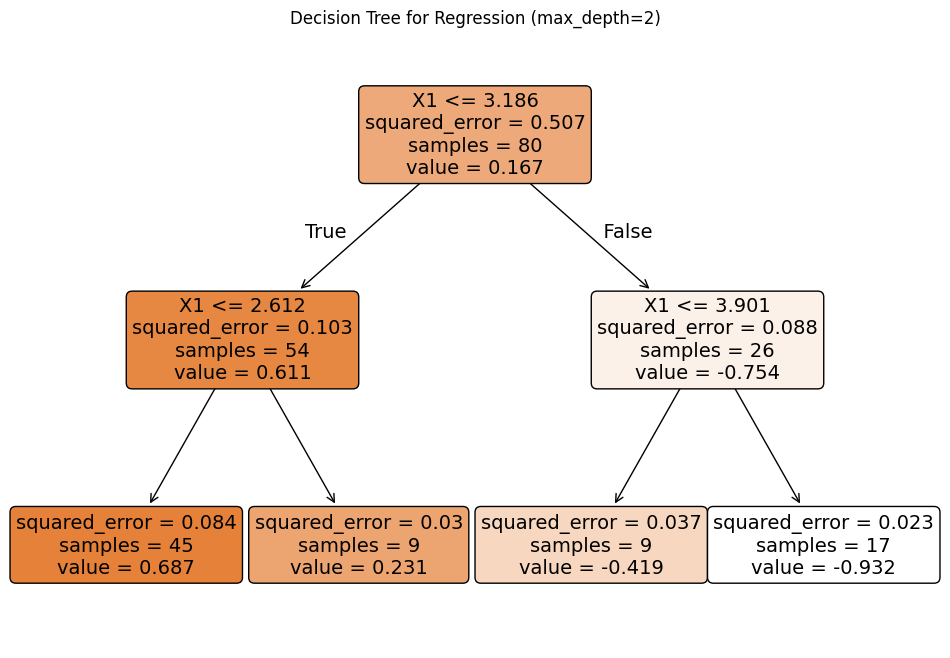

In [2]:
plt.figure(figsize=(12, 8))
plot_tree(tree_reg, filled=True, feature_names=['X1'], rounded=True)
plt.title('Decision Tree for Regression (max_depth=2)')
plt.show()

### Visualizing the Predictions
The predictions of a decision tree regressor result in a step-function.

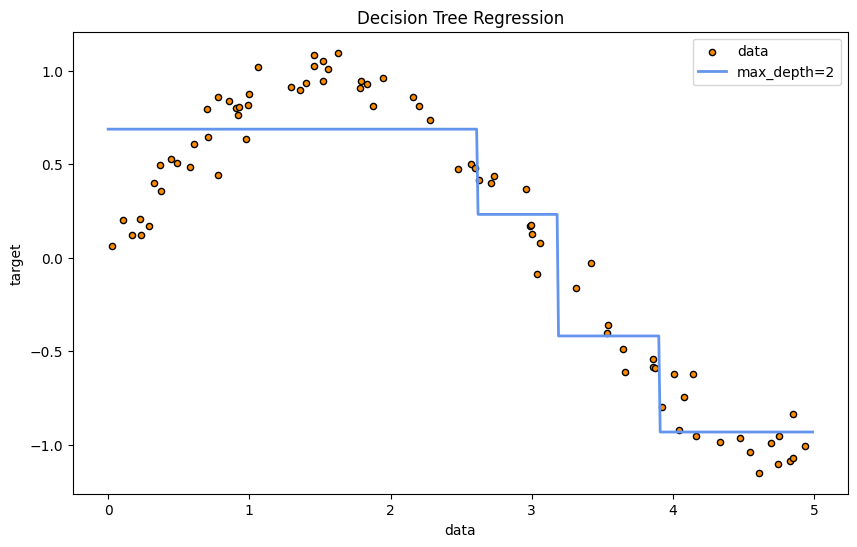

In [3]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = tree_reg.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Overfitting in Decision Trees
If we don't constrain the tree's depth, it will keep splitting until it perfectly fits the training data, leading to severe overfitting.

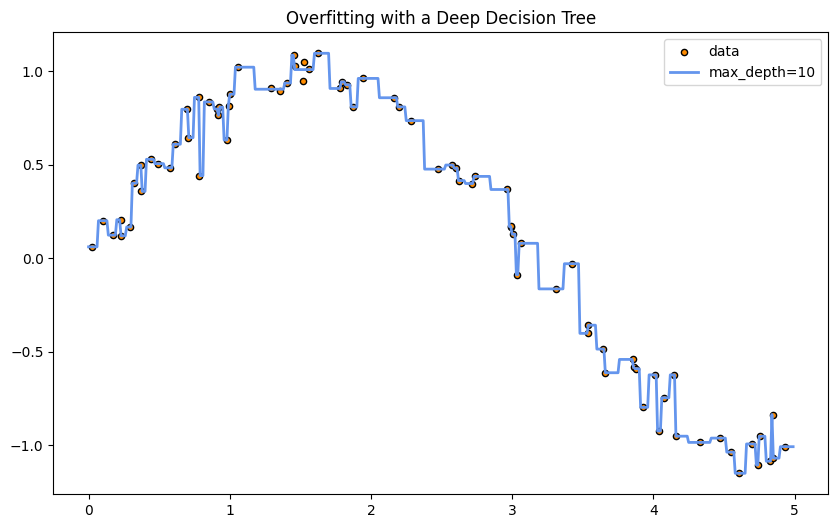

In [4]:
tree_reg_overfit = DecisionTreeRegressor(max_depth=10)
tree_reg_overfit.fit(X, y)

y_pred_overfit = tree_reg_overfit.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred_overfit, color="cornflowerblue", label="max_depth=10", linewidth=2)
plt.title("Overfitting with a Deep Decision Tree")
plt.legend()
plt.show()